<a href="https://colab.research.google.com/github/pmcey/Spaceship_TITANIC_KERAS/blob/main/Spaceship_TITANIC_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="0"></a>
# Let's solve *Spaceship Titanic* with Tensorflow Keras 🦇🦇🦇



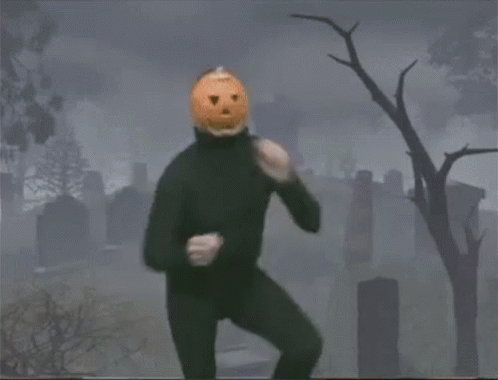


This notebook presents the entire process, starting from importing libraries and loading data, to obtaining a model capable of predicting the fate of passengers on the Titanic Spaceship.



---


**Contents:**


---



1. [Importing libraries](#1)
2. [Mounting Google Drive and reading it into Pandas Dataframe](#2)
3. [Exploring Data](#3)
4. [Data processing](#4)
5. [Data spliting](#5)
6. [Creating model](#6)
7. [Using trained model](#7)
8. [Score](#8)
9. [Credits](#9)


---



<a name="1"></a>
#1. Importing libraries

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

<a name="2"></a>
#2. Mounting Google Drive and reading it into Pandas Dataframe

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Python/dataframes/Spaceship_TITANIC/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Python/dataframes/Spaceship_TITANIC/test.csv")

<a name="3"></a>
#3. Exploring Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

Checking percentage of missing people:

In [ ]:
fig = px.pie(train, names='Transported', title='Transported', color='Transported',color_discrete_map={True:'#3498db', False:'#e74c3c'}, width=600, height=600)
fig.show()

Let's see if VIP status plays important role

In [ ]:
vip_data = train[train['VIP'] == True]
fig = px.pie(vip_data, names='Transported', title='VIPs Transported', color='Transported', color_discrete_map={True:'#3498db', False:'#e74c3c'}, width=600, height=600)
fig.show()

The majority of VIPs were not transported after all. This is an interesting detail, but there are likely many more columns that are significant.


---


**However**,
we kave to take a look at more significant issue. From the description, it appears that the data comes from the spaceship computer system, which has been damaged. Let's see if this has affected the amount of missing data.

In [ ]:
def nulls():
  null = pd.DataFrame(train.isna().sum(), columns = ['null_sum'])
  null['Percentage_of_missing_data(%)'] = round((null['null_sum']/len(train))*100,2)
  return null
print(nulls())

              null_sum  Percentage_of_missing_data(%)
PassengerId          0                           0.00
HomePlanet         201                           2.31
CryoSleep          217                           2.50
Cabin              199                           2.29
Destination        182                           2.09
Age                179                           2.06
VIP                203                           2.34
RoomService        181                           2.08
FoodCourt          183                           2.11
ShoppingMall       208                           2.39
Spa                183                           2.11
VRDeck             188                           2.16
Name               200                           2.30
Transported          0                           0.00


In [ ]:
missing = nulls()
missing = missing[missing['null_sum'] > 0]
value = missing['Percentage_of_missing_data(%)'].mean()

In [ ]:
labels = ['missing_data','data']
values = [value,100-value]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Percentage_of_missing_data', width=600, height=600)
fig.show()

There is a small percentage of missing data. This should be taken into consideration during the data processing.

<a name="4"></a>
#4. Data processing

I am storing the PassengerId in a variable before dropping it; it will be useful during the final model testing."

In [ ]:
test_PassengerId = test['PassengerId']

Removing non-categorical columns.

In [ ]:
train = train.drop(['PassengerId','Cabin','Name'], axis=1)
test = test.drop(['PassengerId','Cabin','Name'], axis=1)

Let's replace the missing data with the mean or mode of the column.
Do it by function.

In [ ]:
def replace_mean(table,column):
  val = table[column].mean()
  table[column].fillna(val,inplace=True)
def replace_mode(table,column):
  val = table[column].mode()[0]
  table[column].fillna(val,inplace=True)

Numerical columns

In [ ]:
replace_mean(train,'Age')
replace_mean(test,'Age')
replace_mean(train,'RoomService')
replace_mean(test,'RoomService')
replace_mean(train,'FoodCourt')
replace_mean(test,'FoodCourt')
replace_mean(train,'ShoppingMall')
replace_mean(test,'ShoppingMall')
replace_mean(train,'Spa')
replace_mean(test,'Spa')
replace_mean(train,'VRDeck')
replace_mean(test,'VRDeck')

Categorical columns

In [ ]:
replace_mode(train,'HomePlanet')
replace_mode(test,'HomePlanet')
replace_mode(train,'CryoSleep')
replace_mode(test,'CryoSleep')
replace_mode(train,'Destination')
replace_mode(test,'Destination')
replace_mode(train,'VIP')
replace_mode(test,'VIP')

In [ ]:
print(nulls())

              null_sum  Percentage_of_missing_data(%)
HomePlanet           0                            0.0
CryoSleep            0                            0.0
Destination          0                            0.0
Age                  0                            0.0
VIP                  0                            0.0
RoomService          0                            0.0
FoodCourt            0                            0.0
ShoppingMall         0                            0.0
Spa                  0                            0.0
VRDeck               0                            0.0
Transported          0                            0.0


Data types

In [ ]:
train.dtypes

HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

Keras doesn't like boolean type. Let's change them.

In [ ]:
train["Transported"] = train["Transported"].astype(int)
train["VIP"] = train["VIP"].astype(int)
test["VIP"] = test["VIP"].astype(int)
train["CryoSleep"] = train["CryoSleep"].astype(int)
test["CryoSleep"] = test["CryoSleep"].astype(int)

In [ ]:
train.dtypes

HomePlanet       object
CryoSleep         int64
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

Turning categorical values into ints

In [ ]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [ ]:
train['HomePlanet'] = train['HomePlanet'].replace({'Earth' : 0, 'Europa' : 1, 'Mars' : 2})
test['HomePlanet'] = test['HomePlanet'].replace({'Earth' : 0, 'Europa' : 1, 'Mars' : 2})

In [ ]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [ ]:
train['Destination']= train['Destination'].replace({'TRAPPIST-1e' : 0, 'PSO J318.5-22' : 1, '55 Cancri e' : 2})
test['Destination']= test['Destination'].replace({'TRAPPIST-1e' : 0, 'PSO J318.5-22' : 1, '55 Cancri e' : 2})

In [ ]:
train.head().T

0      1       2       3      4
HomePlanet     1.0    0.0     1.0     1.0    0.0
CryoSleep      0.0    0.0     0.0     0.0    0.0
Destination    0.0    0.0     0.0     0.0    0.0
Age           39.0   24.0    58.0    33.0   16.0
VIP            0.0    0.0     1.0     0.0    0.0
RoomService    0.0  109.0    43.0     0.0  303.0
FoodCourt      0.0    9.0  3576.0  1283.0   70.0
ShoppingMall   0.0   25.0     0.0   371.0  151.0
Spa            0.0  549.0  6715.0  3329.0  565.0
VRDeck         0.0   44.0    49.0   193.0    2.0
Transported    0.0    1.0     0.0     0.0    1.0

In [ ]:
y = train['Transported']
train = train.drop(['Transported'], axis=1)

At the end of the data preprocessing, let's normalize the data.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

train_scaled

array([[5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.06419207e-03, 2.45001785e-02, 1.82322960e-03],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.99669761e-01, 2.03041478e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.96867019e-02, 4.46269190e-05, 0.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.57533024e-02, 1.34048813e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.97244437e-04]])

<a name="5"></a>
#5. Data spliting

Split tha data - 75% for training, 25% for validation

In [ ]:
X_train, X_val, y_train, y_val  = train_test_split(train_scaled, y, test_size=0.25, random_state=42)

In [ ]:
print(str(len(X_train))+' values in X_train,')
print(str(len(X_val))+' values in X_validation,')
print(str(len(test))+' values in test.')

6519 values in X_train,
2174 values in X_validation,
4277 values in test.


<a name="6"></a>
# 6. Creating model

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

The Dropout layer helps prevent overfitting.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 128)               1408      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 34800 (135.94 KB)
Trainable params: 34800 

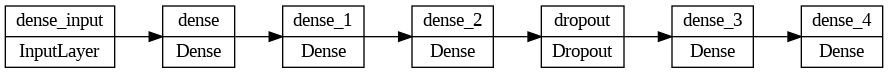

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=False, rankdir="LR")

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=64, batch_size=8)

Epoch 1/64
815/815 [==============================] - 3s 3ms/step - loss: 0.5996 - accuracy: 0.6860 - val_loss: 0.5471 - val_accuracy: 0.7323
Epoch 2/64
815/815 [==============================] - 3s 3ms/step - loss: 0.5576 - accuracy: 0.7250 - val_loss: 0.5239 - val_accuracy: 0.7557
Epoch 3/64
815/815 [==============================] - 5s 7ms/step - loss: 0.5228 - accuracy: 0.7440 - val_loss: 0.4993 - val_accuracy: 0.7695
Epoch 4/64
815/815 [==============================] - 4s 4ms/step - loss: 0.5008 - accuracy: 0.7563 - val_loss: 0.4716 - val_accuracy: 0.7695
Epoch 5/64
815/815 [==============================] - 4s 4ms/step - loss: 0.4807 - accuracy: 0.7702 - val_loss: 0.4807 - val_accuracy: 0.7571
Epoch 6/64
815/815 [==============================] - 4s 5ms/step - loss: 0.4779 - accuracy: 0.7736 - val_loss: 0.4622 - val_accuracy: 0.7879
Epoch 7/64
815/815 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.7728 - val_loss: 0.4577 - val_accuracy: 0.7746
Epoch 

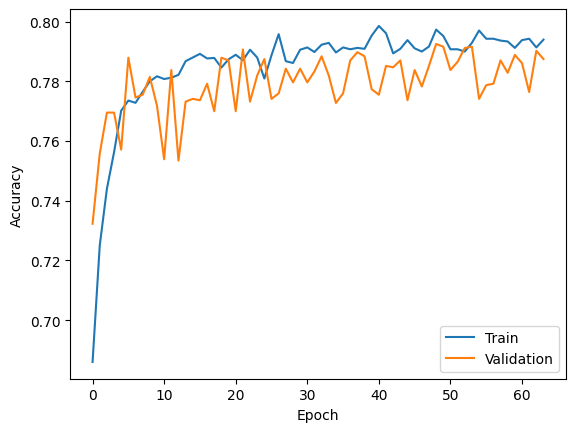

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()

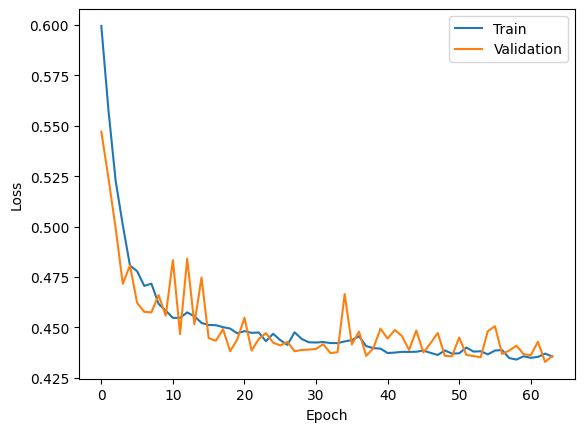

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

<a name="7"></a>
#7. Using trained model

Functions that will be used to predict

In [ ]:
def prediction(data):
  pred = model.predict(data)
  prob = tf.argmax(pred, axis=-1)
  predictions = tf.cast(prob, dtype=tf.float32)
  return predictions

def yes_no(data):
  if (data == 0):
    x = "Missing"
  else:
    x = "Transported"
  return x

Let's create a sample passenger. This passenger will travel as a VIP and used to spend a lot in the Food Court.

In [ ]:
vip_guy = {'HomePlanet': [1],
           'CryoSleep': [0],
           'Destination': [1],
           'Age': [42],
           'VIP': [1],
           'RoomService': [10],
           'FoodCourt': [1869],
           'ShoppingMall': [0],
           'Spa': [0],
           'VRDeck': [82]}
vip_guy = pd.DataFrame(data=vip_guy)

Normalize this data and send it into the function.

In [ ]:
vip_guy_scaled = scaler.transform(vip_guy)

pred = prediction(vip_guy_scaled)
pred_text = yes_no(pred)
print(pred_text)

1/1 [==============================] - 0s 257ms/step
Transported


Next goal is to use the model to check the test set.

In [ ]:
pred = prediction(test_scaled)

vectorized_yes_no = np.vectorize(yes_no)

yes_no_pred = vectorized_yes_no(pred)
yes_no_pred

134/134 [==============================] - 1s 3ms/step


array(['Transported', 'Missing', 'Transported', ..., 'Transported',
       'Transported', 'Transported'], dtype='<U11')

In [ ]:
submission = pd.concat([test_PassengerId, pd.DataFrame({'Predicted': yes_no_pred})], axis=1)
submission.to_csv('submission.csv', index=False)
print(submission)

     PassengerId    Predicted
0        0013_01  Transported
1        0018_01      Missing
2        0019_01  Transported
3        0021_01  Transported
4        0023_01  Transported
...          ...          ...
4272     9266_02  Transported
4273     9269_01      Missing
4274     9271_01  Transported
4275     9273_01  Transported
4276     9277_01  Transported

[4277 rows x 2 columns]


<a name="8"></a>
# Score

Let's check the percentage accuracy of data

In [ ]:
acc_train = accuracy_score(prediction(X_train),y_train)
acc_val = accuracy_score(prediction(X_val),y_val)
print('Metric accuracy score for:\n\ttrain: ' + str(round(acc_train,4)) + '\n\tvalidation: ' + str(round(acc_val,4)))

68/68 [==============================] - 0s 2ms/step
Metric accuracy score for:
	train: 0.7941
	validation: 0.7875


In [ ]:
fig = px.pie(submission, names='Predicted', title='Transported and missing predicted for the test set', color='Predicted',color_discrete_map={'Transported':'#3498db', 'Missing':'#e74c3c'}, width=600, height=600)
fig.show()

<br><br><br>

---

<center>
<h2>
I strongly believe that I have presented the entire process: from data loading, through data processing, to final predictions in an understandable way 🤗
</h2>
</center>

<center>
<img src="https://media1.tenor.com/m/kLxq3yw8JSYAAAAC/oshawott-pokemon.gif" alt="Proud_Oshawot_pokemon.gif">
</center>



---

<br>

<a name="9"></a>
#Credits

The project presentation and data visualization approach were inspired by the work of user Hamza (https://www.kaggle.com/hamzaghanmi).

However,
<b>I am the author of the this notebook and all the code within it.</b>
(https://www.github.com/pmcey)

<hr>

Descriptions of the libraries I used:
<br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
<br>
https://plotly.com/python/pie-charts/
<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
<br>

<hr>

[Up ⬆](#0)